In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

In [2]:
# # startdate = datetime(2010,1,1)
# # enddate = datetime(2019,12,31)

# start = '2010-01-01'
# end = '2019-12-31'

# df = pdr.yahoo.daily.YahooDailyReader('AAPL', start, end)
# df.read()

In [3]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
# download dataframe
data = pdr.get_data_yahoo("SPY", start="2014-01-01", end="2023-12-31")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,183.979996,184.070007,182.479996,182.919998,152.196289,119636900
2014-01-03,183.229996,183.600006,182.630005,182.889999,152.171295,81390600
2014-01-06,183.490005,183.559998,182.080002,182.360001,151.730362,108028200
2014-01-07,183.089996,183.789993,182.949997,183.479996,152.662186,86144200
2014-01-08,183.449997,183.830002,182.889999,183.520004,152.695480,96582300


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,473.859985,475.380005,471.700012,473.649994,472.182892,67126600
2023-12-26,474.070007,476.579987,473.989990,475.649994,474.176697,55387000
2023-12-27,475.440002,476.660004,474.890015,476.510010,475.034058,68000300
2023-12-28,476.880005,477.549988,476.260010,476.690002,475.213501,77158100
2023-12-29,476.489990,477.029999,473.299988,475.309998,473.837769,122234100


In [5]:
df = data.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,183.979996,184.070007,182.479996,182.919998,152.196289,119636900
1,2014-01-03,183.229996,183.600006,182.630005,182.889999,152.171295,81390600
2,2014-01-06,183.490005,183.559998,182.080002,182.360001,151.730362,108028200
3,2014-01-07,183.089996,183.789993,182.949997,183.479996,152.662186,86144200
4,2014-01-08,183.449997,183.830002,182.889999,183.520004,152.695480,96582300


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,183.979996,184.070007,182.479996,182.919998,119636900
1,183.229996,183.600006,182.630005,182.889999,81390600
2,183.490005,183.559998,182.080002,182.360001,108028200
3,183.089996,183.789993,182.949997,183.479996,86144200
4,183.449997,183.830002,182.889999,183.520004,96582300


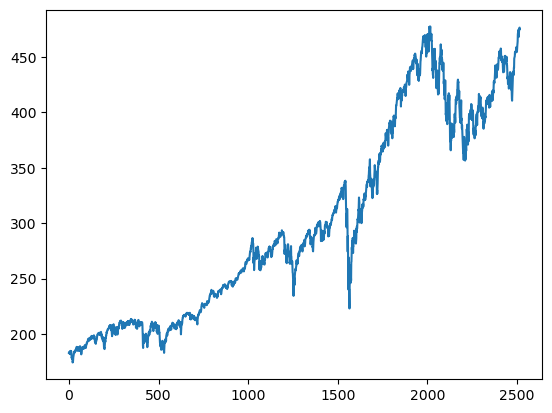

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,183.979996,184.070007,182.479996,182.919998,119636900
1,183.229996,183.600006,182.630005,182.889999,81390600
2,183.490005,183.559998,182.080002,182.360001,108028200
3,183.089996,183.789993,182.949997,183.479996,86144200
4,183.449997,183.830002,182.889999,183.520004,96582300
...,...,...,...,...,...
2511,473.859985,475.380005,471.700012,473.649994,67126600
2512,474.070007,476.579987,473.989990,475.649994,55387000
2513,475.440002,476.660004,474.890015,476.510010,68000300
2514,476.880005,477.549988,476.260010,476.690002,77158100


In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    442.848701
2512    443.116801
2513    443.413801
2514    443.673601
2515    443.939201
Name: Close, Length: 2516, dtype: float64

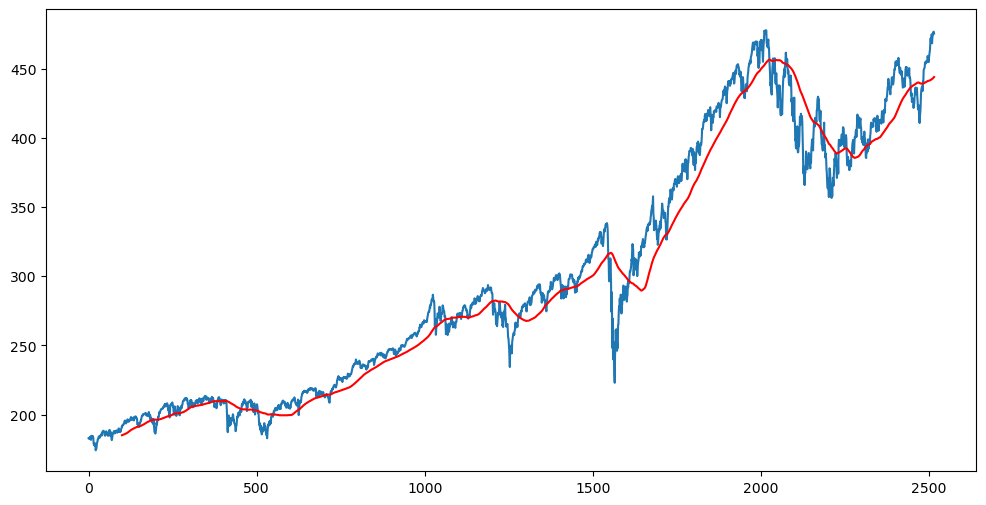

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2511    432.596901
2512    433.045601
2513    433.501351
2514    433.926151
2515    434.356301
Name: Close, Length: 2516, dtype: float64

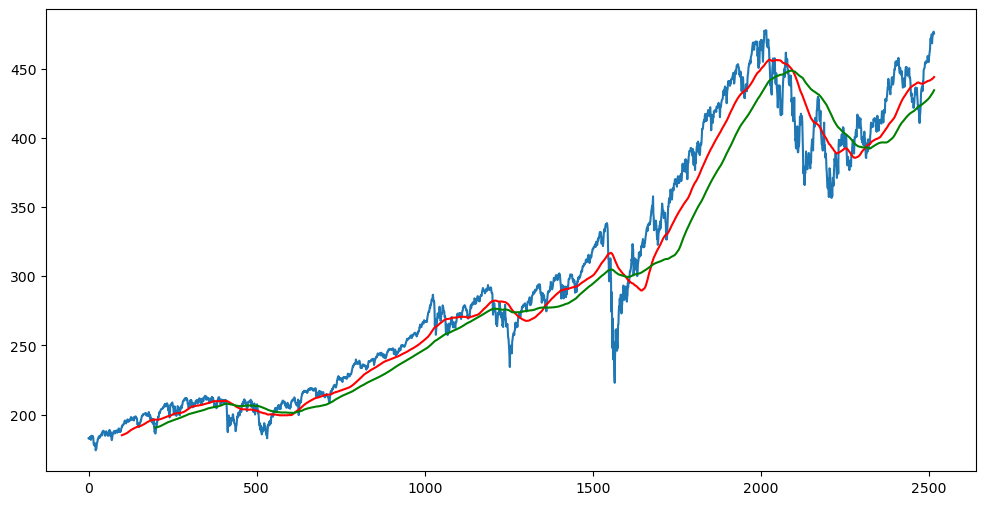

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(2516, 5)

In [14]:
# Split data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2012, 1)
(504, 1)


In [15]:
data_training.head()

,Close
0,182.919998
1,182.889999
2,182.360001
3,183.479996
4,183.520004


In [16]:
data_testing.head()

,Close
2012,477.480011
2013,476.160004
2014,474.959991
2015,477.709991
2016,477.549988


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02886931],
       [0.02877034],
       [0.02702168],
       ...,
       [0.97802632],
       [1.        ],
       [0.99871321]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(1912, 100, 1)

In [22]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\kevin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - loss: 0.0656
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0079
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - loss: 0.0056
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0049
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0046
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0048
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0057
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.0043
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0044
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0039
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0044
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0044
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0037
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0037
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss:

In [27]:
model.save('keras_model2.keras')

In [28]:
data_testing.head()

,Close
2012,477.480011
2013,476.160004
2014,474.959991
2015,477.709991
2016,477.549988


In [29]:
data_training.tail(100)

,Close
1912,442.489990
1913,442.130005
1914,442.679993
1915,443.779999
1916,445.109985
...,...
2007,463.059998
2008,467.690002
2009,470.600006
2010,477.260010


In [30]:
past_100_days = data_training.tail(100)

In [31]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_416\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [32]:
final_df.head()

,Close
0,442.489990
1,442.130005
2,442.679993
3,443.779999
4,445.109985


In [33]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.70928598],
       [0.70631458],
       [0.71085431],
       [0.71993401],
       [0.73091203],
       [0.73759819],
       [0.74626503],
       [0.72208019],
       [0.6819645 ],
       [0.68757732],
       [0.71646712],
       [0.74865883],
       [0.75451926],
       [0.76227826],
       [0.7404046 ],
       [0.7733389 ],
       [0.78968236],
       [0.78415192],
       [0.78613285],
       [0.79760635],
       [0.79669826],
       [0.78332644],
       [0.77878672],
       [0.76285611],
       [0.73363607],
       [0.74304576],
       [0.72315328],
       [0.75377641],
       [0.74791598],
       [0.7002889 ],
       [0.63953789],
       [0.63615362],
       [0.67106886],
       [0.71498142],
       [0.7210071 ],
       [0.71052432],
       [0.63689647],
       [0.64292215],
       [0.59909221],
       [0.64118858],
       [0.59496509],
       [0.63177889],
       [0.6466364 ],
       [0.67767239],
       [0.67106886],
       [0.64490309],
       [0.636071  ],
       [0.648

In [34]:
input_data.shape

(604, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(504, 100, 1)
(504,)


In [37]:
# Predictions

y_predicted = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step


In [38]:
y_predicted.shape

(504, 1)

In [39]:
y_predicted

array([[0.8692641 ],
       [0.87379915],
       [0.8796202 ],
       [0.8860424 ],
       [0.8926328 ],
       [0.8990932 ],
       [0.904644  ],
       [0.90869015],
       [0.91094774],
       [0.9114171 ],
       [0.9105658 ],
       [0.90902925],
       [0.906959  ],
       [0.90437603],
       [0.9009033 ],
       [0.89600396],
       [0.88918793],
       [0.8798579 ],
       [0.8679478 ],
       [0.8532693 ],
       [0.8361796 ],
       [0.81722003],
       [0.7980728 ],
       [0.7810662 ],
       [0.76730275],
       [0.757904  ],
       [0.75236803],
       [0.7497879 ],
       [0.74912333],
       [0.749787  ],
       [0.7519025 ],
       [0.75487864],
       [0.7573281 ],
       [0.75812775],
       [0.7573427 ],
       [0.7554984 ],
       [0.7523929 ],
       [0.74764574],
       [0.74083376],
       [0.73107296],
       [0.71867216],
       [0.70566034],
       [0.6936211 ],
       [0.682629  ],
       [0.6732829 ],
       [0.6658336 ],
       [0.65993613],
       [0.654

In [40]:
scaler.scale_

array([0.00825423])

In [41]:
scale_factor = 1 / (0.01128668)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

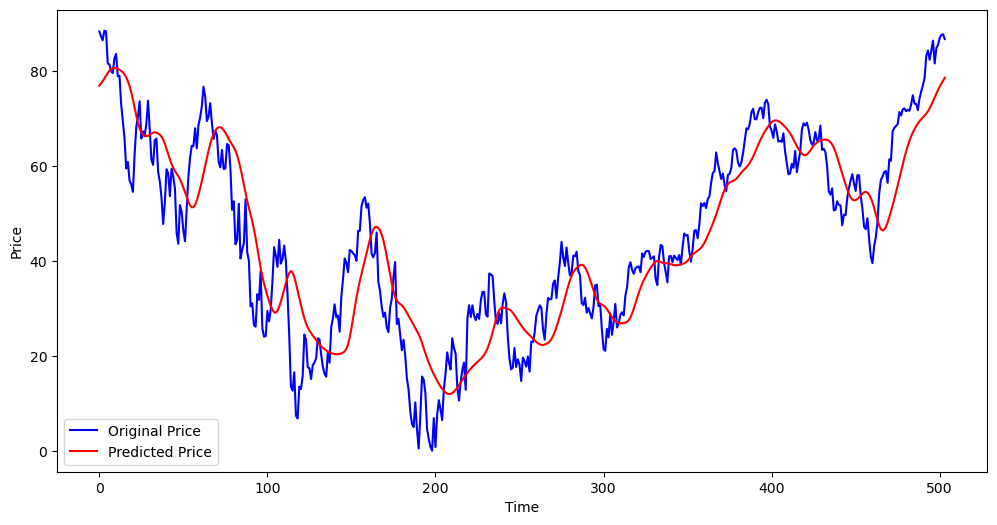

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9b/ea/7219c01b5e92d02d2bc994a36245d99331cd66eb12d284707a2060a013d0/streamlit-1.32.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/fa/2a/7f3714cbc6356a0efec525ce7a0613d581072ed6eb53eb7b9754f33db807/blinker-1.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/fb/2b/a64c2d25a37aeb921fddb929111413049fc5f8b9a4c1aefaffaafe768d54/cachetools-5.3.3-py3-none-any.whl.metadata
  Obtaining dependenc

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


SyntaxError: invalid syntax (3737097518.py, line 1)